# **Background**

Due to rising greenhouse gas emissions, major industries are turning to Carbon Capture, Utilization, and Storage (CCUS) strategies as a critical climate solution. To ensure that captured CO₂ remains safely stored underground for the long term, several trapping mechanisms work together to confine it within subsurface formations.

* The first line of defense is **structural and stratigraphic trapping**, where impermeable rock layers, known as caprocks act like geological umbrellas, preventing CO₂ from migrating upward and potentially escaping to the surface.

* As CO₂ moves through the porous rock over time, **residual trapping** comes into play, effectively immobilizing portions of the CO₂ as isolated bubbles trapped within the tiny spaces between rock grains.

* Over longer periods, **solubility trapping** becomes increasingly important as CO₂ gradually dissolves into the naturally occurring brine within the rock formation. This dissolution process reduces the buoyancy of the CO₂, making it less likely to migrate upward.

* Finally, **mineral trapping** represents the most permanent form of storage, where CO₂ undergoes chemical reactions with the surrounding rock to form stable carbonate minerals—essentially turning the gas into stone.

However, there's another critical factor that influences all of these trapping mechanisms: the wettability of mineral surfaces. Wettability, which scientists measure through contact angles formed where brine, CO₂, and mineral surfaces meet, determines how these fluids interact within the rock's pore network. Think of it like how water either beads up on a freshly waxed car or spreads out evenly—minerals can exhibit similar preferences for either CO₂ or brine.

This wettability behavior directly impacts whether CO₂ spreads along mineral surfaces or remains as separate droplets, which in turn affects how much CO₂ can be stored, how effectively it becomes trapped, and how stable the storage system remains over decades or centuries. This is precisely why researchers need to understand and predict contact angles across the wide range of pressure, temperature, salinity, and rock composition conditions found in real underground storage sites.

# Dataset

You will be working with two datasets for this challenge:

* Training Dataset: A synthetic dataset containing 5,000 observations with comprehensive parameter coverage. This dataset includes key variables such as pressure (MPa), temperature (K), salinity (M), mineral type (quartz, calcite, mica, feldspar), contact angle type (static, advancing, receding), and baseline angle (θ₀).


* Testing Dataset: A real-world dataset comprising 630 observations collected from literature. This dataset will serve as the benchmark for evaluating your model's performance on real-world experimental conditions, providing a test of how well your approach generalizes from synthetic training data to real-world scenarios.

# Algorithm

We encourage participants to explore and experiment with any machine learning approach they find suitable for this challenge. Whether you prefer traditional machine learning algorithms like random forests, support vector machines, or gradient boosting methods, or you're interested in implementing deep learning architectures such as neural networks, convolutional networks, or more advanced models; all approaches are welcome.

# Metrics


$$
AARE(\%) = \frac{1}{N} \sum_{i=1}^{N} \left| \frac{\theta_i^{pred} - \theta_i^{exp}}{\theta_i^{exp}} \right| \times 100
$$



$$
RMSE = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( \theta_i^{pred} - \theta_i^{exp} \right)^2 }
$$




$$
R = \frac{\sum_{i=1}^{N} \left( \theta_i^{exp} - \overline{\theta^{exp}} \right)\left( \theta_i^{pred} - \overline{\theta^{pred}} \right)}
{\sqrt{\sum_{i=1}^{N} \left( \theta_i^{exp} - \overline{\theta^{exp}} \right)^2 \cdot \sum_{i=1}^{N} \left( \theta_i^{pred} - \overline{\theta^{pred}} \right)^2}}
$$


Lower AARE values indicate better model performance, with 0% representing perfect predictions. The winning models will be those that achieve the lowest AARE on the real-world testing dataset.

#### **References**

Daryasafar, A., Keykhosravi, A., & Shahbazi, K. (2019). Modeling CO2 wettability behavior at the interface of brine/CO2/mineral: Application to CO2 geo-sequestration. Journal of Cleaner Production, 239, 118101.



## Data exploration

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load train
train = pd.read_csv("Desktop/REX LOGS/train.csv")
train = train.sort_values(by=['mineral','contact_type', 'theta0']).reset_index(drop=True)

#load test
test = pd.read_csv("Desktop/REX LOGS/test.csv")

In [106]:
train.head()

,pressure,temperature,salinity,mineral,contact_type,theta0,contact_angle
0,32.868251,309.009477,3.117627,calcite,adv,0,47.496677
1,12.635066,341.108698,0.247334,calcite,adv,0,56.622521
2,28.776101,324.380597,3.643516,calcite,adv,0,42.643842
3,38.418634,300.006464,1.058658,calcite,adv,0,35.274289
4,27.408971,320.644919,5.662101,calcite,adv,0,46.468174


In [107]:
train.shape

(5000, 7)

In [108]:
test.head()

,pressure,temperature,salinity,mineral,contact_type,theta0
0,2.98870,298.0,0.0,quartz,st,3
1,3.97740,298.0,0.0,quartz,st,3
2,5.00565,298.0,0.0,quartz,st,3
3,5.99435,298.0,0.0,quartz,st,3
4,6.98305,298.0,0.0,quartz,st,3


In [109]:
test.shape

(630, 6)

In [110]:
#check for empty values
train.isna().sum()

pressure         0
temperature      0
salinity         0
mineral          0
contact_type     0
theta0           0
contact_angle    0
dtype: int64

In [111]:
test.isnull().sum()

pressure        0
temperature     0
salinity        0
mineral         0
contact_type    0
theta0          0
dtype: int64

In [112]:
#check data types
train.dtypes

pressure         float64
temperature      float64
salinity         float64
mineral           object
contact_type      object
theta0             int64
contact_angle    float64
dtype: object

# Data visualization

C:\Users\USER\AppData\Local\Temp\ipykernel_8972\2697304484.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


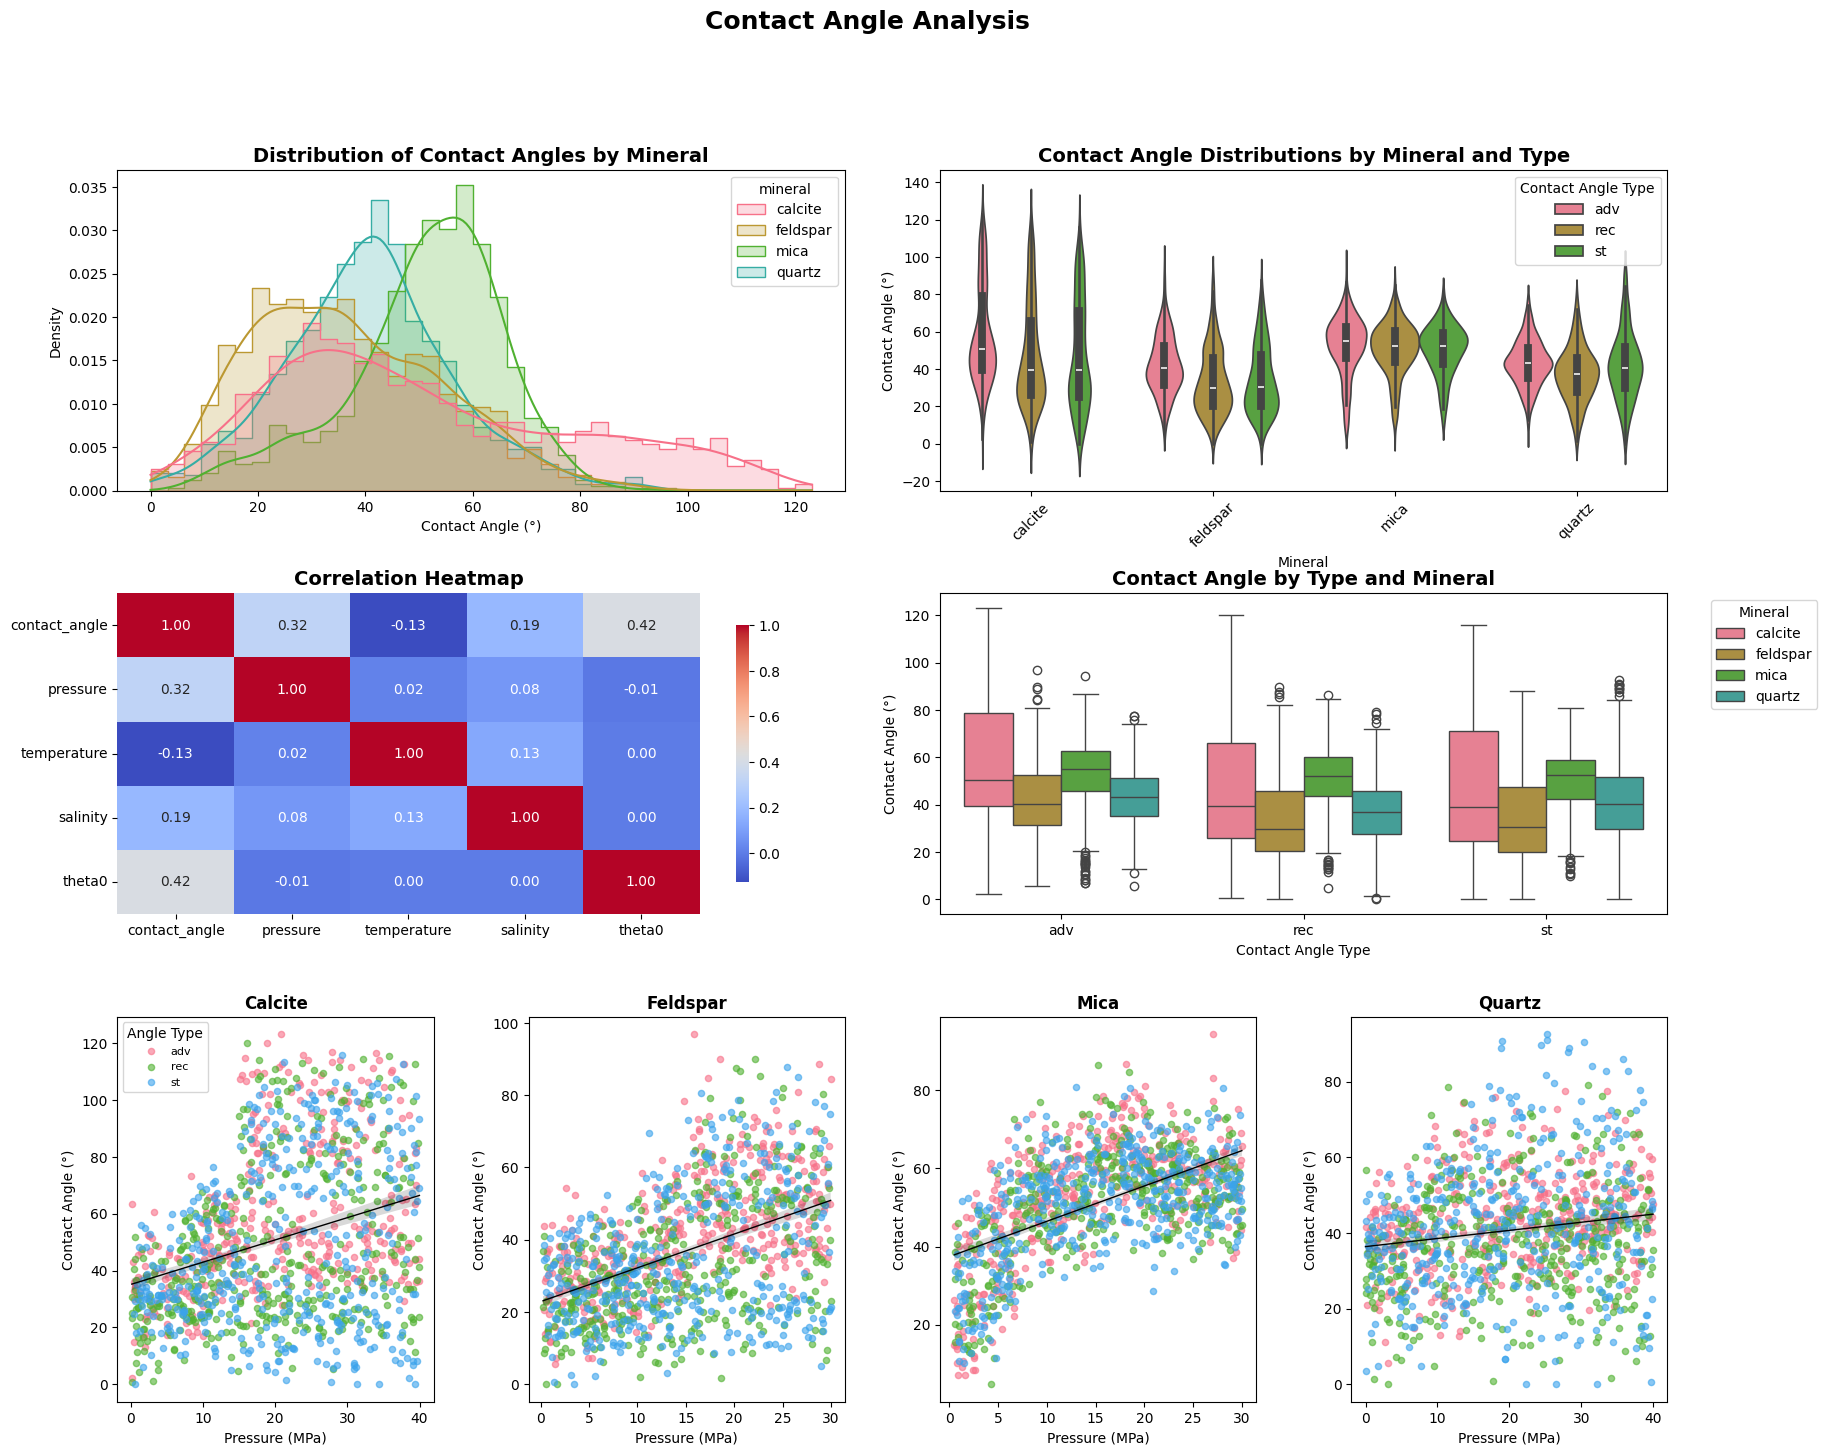

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('default')
sns.set_palette("husl")


fig = plt.figure(figsize=(20, 16))

# a grid layout
gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1.2], width_ratios=[1, 1, 1, 1],
                      hspace=0.3, wspace=0.3)

# -----------------------------
# Distribution plots per mineral
# -----------------------------
ax1 = fig.add_subplot(gs[0, :2])
sns.histplot(data=train, x="contact_angle", hue="mineral", kde=True,
             element="step", stat="density", common_norm=False, ax=ax1)
ax1.set_title("Distribution of Contact Angles by Mineral", fontsize=14, fontweight='bold')
ax1.set_xlabel("Contact Angle (°)")
ax1.set_ylabel("Density")
# ax1.legend(title="Mineral", loc='upper right')

# -----------------------------
# Violin plots by mineral and CA type
# -----------------------------
ax2 = fig.add_subplot(gs[0, 2:])
sns.violinplot(data=train, x="mineral", y="contact_angle", hue="contact_type",
               split=False, ax=ax2)
ax2.set_title("Contact Angle Distributions by Mineral and Type", fontsize=14, fontweight='bold')
ax2.set_xlabel("Mineral")
ax2.set_ylabel("Contact Angle (°)")
ax2.legend(title="Contact Angle Type", loc='upper right')
plt.setp(ax2.get_xticklabels(), rotation=45)

# -----------------------------
# 3. Correlation heatmap
# -----------------------------
ax3 = fig.add_subplot(gs[1, :2])
corr = train[["contact_angle", "pressure", "temperature", "salinity", "theta0"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=ax3,
            cbar_kws={'shrink': 0.8})
ax3.set_title("Correlation Heatmap", fontsize=14, fontweight='bold')

# -----------------------------
# Box plots by angle type
# -----------------------------
ax4 = fig.add_subplot(gs[1, 2:])
sns.boxplot(data=train, x="contact_type", y="contact_angle", hue="mineral", ax=ax4)
ax4.set_title("Contact Angle by Type and Mineral", fontsize=14, fontweight='bold')
ax4.set_xlabel("Contact Angle Type")
ax4.set_ylabel("Contact Angle (°)")
ax4.legend(title="Mineral", bbox_to_anchor=(1.05, 1), loc='upper left')

# -----------------------------
# 5. Scatterplot
# -----------------------------
minerals = train['mineral'].unique()
colors = sns.color_palette("husl", n_colors=len(train['contact_type'].unique()))
angle_types = train['contact_type'].unique()

for i, mineral in enumerate(minerals):
    ax = fig.add_subplot(gs[2, i])
    mineral_data = train[train['mineral'] == mineral]

    for j, angle_type in enumerate(angle_types):
        type_data = mineral_data[mineral_data['contact_type'] == angle_type]
        ax.scatter(type_data['pressure'], type_data['contact_angle'],
                  alpha=0.6, s=20, label=angle_type, color=colors[j])

    # Add trend line
    sns.regplot(data=mineral_data, x='pressure', y='contact_angle',
                scatter=False, ax=ax, color='black', line_kws={'linewidth': 1})

    ax.set_title(f'{mineral.capitalize()}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Pressure (MPa)')
    ax.set_ylabel('Contact Angle (°)')

    if i == 0:  # Only show legend for first subplot
        ax.legend(title='Angle Type', fontsize=8)

fig.suptitle('Contact Angle Analysis', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()



# Model training

In [186]:
plot_cols = ['pressure', 'temperature', 'salinity', 'theta0', 'mineral', 'contact_type', 'contact_angle']
Train2 = train[plot_cols]

X = Train2[['pressure', 'temperature', 'salinity', 'theta0', 'contact_type']]
y = Train2['contact_angle']

In [187]:
#encode catgorical variables
train_encoded = pd.get_dummies(Train2, columns=['mineral', 'contact_type'], drop_first=True)
test_encoded = pd.get_dummies(test, columns=['mineral', 'contact_type'], drop_first=True)


#split features and target
X_train = train_encoded.drop(['contact_angle'], axis=1)
y_train = train_encoded['contact_angle']

X_test = test_encoded


#encode catgorical variables
train_encoded = pd.get_dummies(train, columns=['mineral', 'contact_type'], drop_first=True)
test_encoded = pd.get_dummies(test, columns=['mineral', 'contact_type'], drop_first=True)


#split features and target
X_train = train_encoded.drop(['contact_angle'], axis=1)
y_train = train_encoded['contact_angle']

X_test = test_encoded



In [188]:
X_train

,pressure,temperature,salinity,theta0,mineral_feldspar,mineral_mica,mineral_quartz,contact_type_rec,contact_type_st
0,32.868251,309.009477,3.117627,0,False,False,False,False,False
1,12.635066,341.108698,0.247334,0,False,False,False,False,False
2,28.776101,324.380597,3.643516,0,False,False,False,False,False
3,38.418634,300.006464,1.058658,0,False,False,False,False,False
4,27.408971,320.644919,5.662101,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4995,23.059556,322.339346,10.448726,4,False,False,True,False,True
4996,4.760852,301.307447,6.237793,4,False,False,True,False,True
4997,10.324306,331.726877,1.719367,4,False,False,True,False,True
4998,35.989723,344.387336,5.658572,4,False,False,True,False,True


In [189]:
from sklearn.model_selection import train_test_split

#split train into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,
                                                  random_state=42)


In [190]:
X_train

,pressure,temperature,salinity,theta0,mineral_feldspar,mineral_mica,mineral_quartz,contact_type_rec,contact_type_st
3716,9.879906,312.053263,10.544363,4,False,True,False,False,True
3779,29.953053,346.138364,8.009979,0,False,False,True,False,False
135,5.019902,319.890098,4.626606,1,False,False,False,False,False
4480,3.249185,372.428798,2.014999,3,False,False,True,True,False
1437,24.301694,313.798224,0.222211,2,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4426,4.197207,314.637466,12.727947,3,False,False,True,True,False
466,35.013878,325.637322,1.392680,0,False,False,False,True,False
3092,13.621688,333.416339,7.573387,2,False,True,False,True,False
3772,9.277884,326.099762,7.668745,0,False,False,True,False,False


## Feature Scaling

In [191]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)

In [192]:
X_val1 = sc.transform(X_val)

In [193]:
X_train1

array([[-0.7270023 , -0.91178869,  1.86111831, ..., -0.58214022,
        -0.71596441,  1.39810396],
       [ 1.20539061,  1.32595058,  1.14139658, ...,  1.71779919,
        -0.71596441, -0.71525439],
       [-1.1948631 , -0.39728845,  0.18057685, ..., -0.58214022,
        -0.71596441, -0.71525439],
       ...,
       [-0.36679009,  0.4907301 ,  1.01741209, ..., -0.58214022,
         1.39671746, -0.71525439],
       [-0.78495754,  0.01038554,  1.04449203, ...,  1.71779919,
        -0.71596441, -0.71525439],
       [ 0.98424419, -0.31755763,  0.23393212, ..., -0.58214022,
        -0.71596441,  1.39810396]])

## Multiple Linear Rigression

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

MLR_model = LinearRegression()
MLR_model.fit(X_train, y_train)
y_pred1 = MLR_model.predict(X_train)
mae = metrics.mean_absolute_error(y_train, y_pred1)
mse= metrics.mean_squared_error(y_train, y_pred1)
rmse = mse**0.5
r2 = metrics.r2_score(y_train, y_pred1)

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
""")



MSE: 	246.8334
MAE: 	12.1406
RMSE: 	15.711
r2: 	0.419



In [195]:
#performance on validation set
y_pred2 = MLR_model.predict(X_val)
mae = metrics.mean_absolute_error(y_val, y_pred2)
mse= metrics.mean_squared_error(y_val, y_pred2)
rmse = mse**0.5
r2 = metrics.r2_score(y_val, y_pred2)
N = len(y_val)
AARE = (np.sum(np.abs((y_pred2 - y_val) / y_val)) / N) * 100

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
AARE: \t{AARE:.2f}%
""")


MSE: 	270.6962
MAE: 	12.8889
RMSE: 	16.453
r2: 	0.389
AARE: 	65.63%



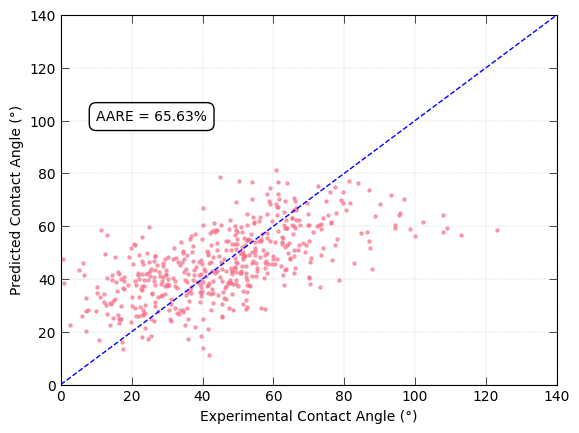

In [196]:
#visualize
plt.scatter(y_val, y_pred2, alpha=0.6, s=5)
plt.plot([0, 140], [0, 140], 'b--', lw=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tick_params(axis='both', which='both', direction='in',
                length=6, width=0.5, top=True, right=True)
plt.xlabel('Experimental Contact Angle (°)')
plt.ylabel('Predicted Contact Angle (°)')
# plt.title('Predicted vs Experimental Contact Angle')
plt.text(10, 100, f'AARE = {AARE:.2f}%', fontsize=10,
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
plt.xlim(0, 140)
plt.ylim(0, 140)
plt.show()

## Random Forest Regression 

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

RDF = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    estimator=RDF,
    param_distributions=param_grid,
    n_iter=30,          # number of random combos to test
    cv=5,               # 5-fold cross validation
    scoring='r2',       # evaluation metric
    n_jobs=-1,
    random_state=42
)
search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best R²:", search.best_score_)


Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best R²: 0.7082783880957881


In [197]:
#train model
RDF_model = RandomForestRegressor(n_estimators=500,  # more trees for stability
    max_depth=30,            # limit tree depth
    min_samples_split=2,     # require at least 5 samples to split
    min_samples_leaf=2,      # require at least 2 samples per leaf
    max_features='sqrt',     # good rule of thumb
    bootstrap=True,          # enables bagging
    n_jobs=-1,               # use all CPU cores
    random_state=42)
RDF_model.fit(X_train, y_train)
y_pred1 = RDF_model.predict(X_train)
mae = metrics.mean_absolute_error(y_train, y_pred1)
mse= metrics.mean_squared_error(y_train, y_pred1)
rmse = mse**0.5
r2 = metrics.r2_score(y_train, y_pred1)

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
""")


MSE: 	20.5059
MAE: 	3.5458
RMSE: 	4.528
r2: 	0.952



In [198]:
#performance on validation set
y_pred3 = RDF_model.predict(X_val)
mae = metrics.mean_absolute_error(y_val, y_pred3)
mse= metrics.mean_squared_error(y_val, y_pred3)
rmse = mse**0.5
r2 = metrics.r2_score(y_val, y_pred3)
N = len(y_val)
AARE = (np.sum(np.abs((y_pred3 - y_val) / y_val)) / N) * 100

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
AARE: \t{AARE:.2f}%
""")


MSE: 	60.4030
MAE: 	6.2107
RMSE: 	7.772
r2: 	0.864
AARE: 	29.46%



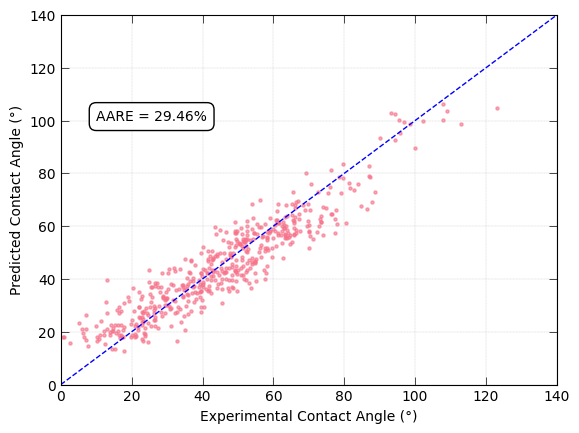

In [199]:
#visualize
plt.scatter(y_val, y_pred3, alpha=0.6, s=5)
plt.plot([0, 140], [0, 140], 'b--', lw=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tick_params(axis='both', which='both', direction='in',
                length=6, width=0.5, top=True, right=True)
plt.xlabel('Experimental Contact Angle (°)')
plt.ylabel('Predicted Contact Angle (°)')
# plt.title('Predicted vs Experimental Contact Angle')
plt.text(10, 100, f'AARE = {AARE:.2f}%', fontsize=10,
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
plt.xlim(0, 140)
plt.ylim(0, 140)
plt.show()

pressure            0.248757
temperature         0.192732
salinity            0.100859
theta0              0.266408
mineral_feldspar    0.023999
mineral_mica        0.070851
mineral_quartz      0.049978
contact_type_rec    0.021096
contact_type_st     0.025319
dtype: float64


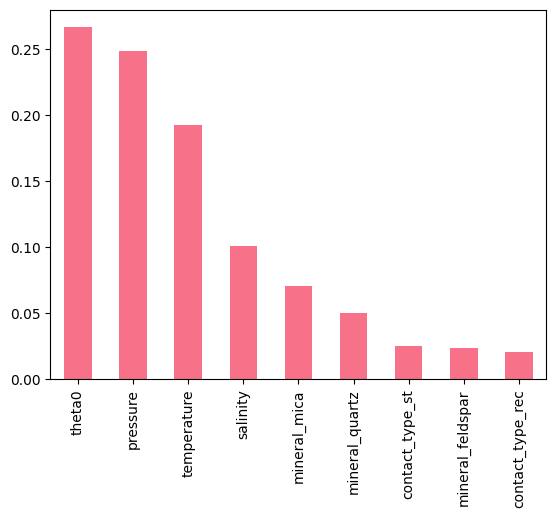

In [200]:
importance = pd.Series(RDF_model.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False).plot(kind='bar')
print(importance)

## Decision Tree Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train1, y_train)
print("Best Parameters:", grid.best_params_)
print("Best R²:", search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best R²: 0.8527489554096208


In [201]:
DTR_model = DecisionTreeRegressor(criterion='squared_error',   # MSE-based split
    splitter='best',             # or 'random' for stochastic effect
    max_depth=10,                # limit complexity
    min_samples_split=2,         # require at least 4 samples to split
    min_samples_leaf=4,          # minimum 2 samples per leaf
    max_features= None,         # consider subset of features
    random_state=42)
DTR_model.fit(X_train1, y_train)
y_pred1 = DTR_model.predict(X_train1)
mae = metrics.mean_absolute_error(y_train, y_pred1)
mse= metrics.mean_squared_error(y_train, y_pred1)
rmse = mse**0.5
r2 = metrics.r2_score(y_train, y_pred1)
print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
""")


MSE: 	33.7509
MAE: 	4.5604
RMSE: 	5.810
r2: 	0.921



In [202]:
#performance on validation set
y_pred4 = DTR_model.predict(X_val1)
mae = metrics.mean_absolute_error(y_val, y_pred4)
mse= metrics.mean_squared_error(y_val, y_pred4)
rmse = mse**0.5
r2 = metrics.r2_score(y_val, y_pred4)
N = len(y_val)
AARE = (np.sum(np.abs((y_pred4 - y_val) / y_val)) / N) * 100

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
AARE: \t{AARE:.2f}%
""")


MSE: 	74.8686
MAE: 	6.7634
RMSE: 	8.653
r2: 	0.831
AARE: 	29.38%



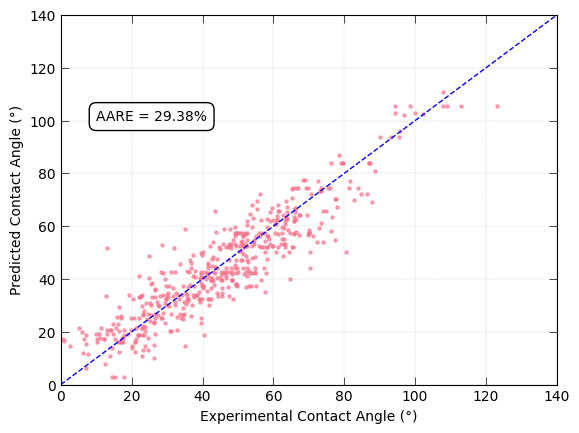

In [203]:
#visualize
plt.scatter(y_val, y_pred4, alpha=0.6, s=5)
plt.plot([0, 140], [0, 140], 'b--', lw=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tick_params(axis='both', which='both', direction='in',
                length=6, width=0.5, top=True, right=True)
plt.xlabel('Experimental Contact Angle (°)')
plt.ylabel('Predicted Contact Angle (°)')
# plt.title('Predicted vs Experimental Contact Angle')
plt.text(10, 100, f'AARE = {AARE:.2f}%', fontsize=10,
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
plt.xlim(0, 140)
plt.ylim(0, 140)
plt.show()

pressure            0.242922
temperature         0.228201
salinity            0.067143
theta0              0.234418
mineral_feldspar    0.027303
mineral_mica        0.102203
mineral_quartz      0.039997
contact_type_rec    0.032257
contact_type_st     0.025557
dtype: float64


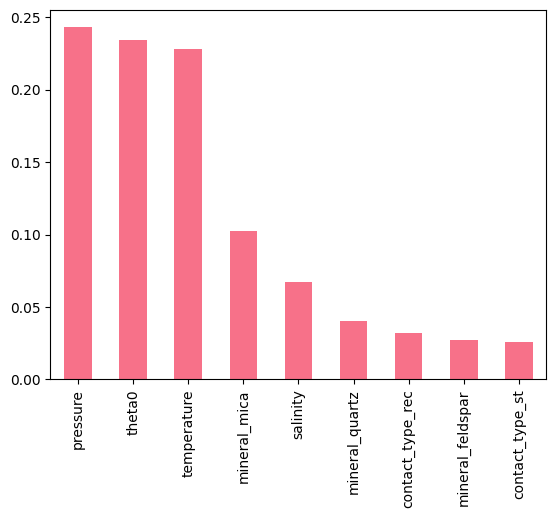

In [204]:
importance = pd.Series(DTR_model.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False).plot(kind='bar')
print(importance)

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Base model
SVR_model1 = SVR()

# Parameter grid for optimization
param_grid = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'degree': [2, 3, 4]  # relevant only for 'poly'
}

# Grid search setup
grid = GridSearchCV(
    estimator=SVR_model1,
    param_grid=param_grid,
    cv=5,
    scoring='r2',       # or 'neg_mean_absolute_error'
    n_jobs=-1,
    verbose=2
)

# Fit
grid.fit(X_train1, y_train)


print("✅ Best Parameters:", grid.best_params_)
print("Best CV R² Score:", grid.best_score_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits


In [205]:
from sklearn.svm import SVR
SVR_model = SVR(kernel = 'linear', C= 0.1,
    gamma= 'scale',     
    epsilon= 0.01,
    degree= 2,
    verbose=2)
SVR_model.fit(X_train1, y_train)
y_pred1 = SVR_model.predict(X_train1)
mae = metrics.mean_absolute_error(y_train, y_pred1)
mse= metrics.mean_squared_error(y_train, y_pred1)
rmse = mse**0.5
r2 = metrics.r2_score(y_train, y_pred1)
print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
""")

[LibSVM]
MSE: 	254.5695
MAE: 	12.0438
RMSE: 	15.955
r2: 	0.401



In [206]:
#performance on validation set
y_pred5 = SVR_model.predict(X_val1)
mae = metrics.mean_absolute_error(y_val, y_pred5)
mse= metrics.mean_squared_error(y_val, y_pred5)
rmse = mse**0.5
r2 = metrics.r2_score(y_val, y_pred5)
N = len(y_val)
AARE = (np.sum(np.abs((y_pred5 - y_val) / y_val)) / N) * 100

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
AARE: \t{AARE:.2f}%
""")


MSE: 	274.5942
MAE: 	12.8108
RMSE: 	16.571
r2: 	0.381
AARE: 	62.90%



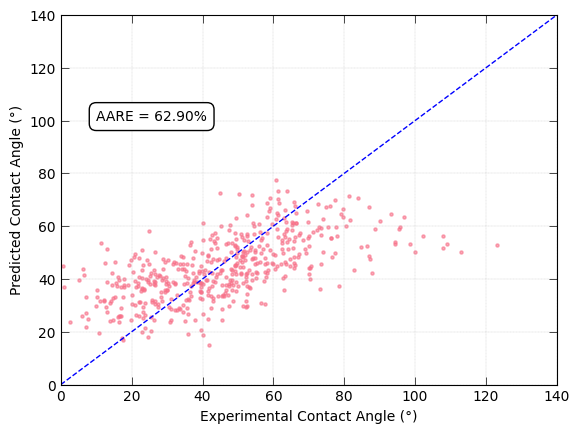

In [207]:
#visualize
import matplotlib.pyplot as plt


plt.scatter(y_val, y_pred5, alpha=0.6, s=5)
plt.plot([0, 140], [0, 140], 'b--', lw=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tick_params(axis='both', which='both', direction='in',
                length=6, width=0.5, top=True, right=True)
plt.xlabel('Experimental Contact Angle (°)')
plt.ylabel('Predicted Contact Angle (°)')
# plt.title('Predicted vs Experimental Contact Angle')
plt.text(10, 100, f'AARE = {AARE:.2f}%', fontsize=10,
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
plt.xlim(0, 140)
plt.ylim(0, 140)
plt.show()

theta0              7.443581
pressure            6.170484
mineral_quartz      3.969452
salinity            3.523241
contact_type_rec    3.180438
mineral_feldspar    2.211795
mineral_mica        2.141994
contact_type_st     1.914205
temperature         1.212332
dtype: float64


<Axes: title={'center': 'Feature Importance (Linear SVR)'}>

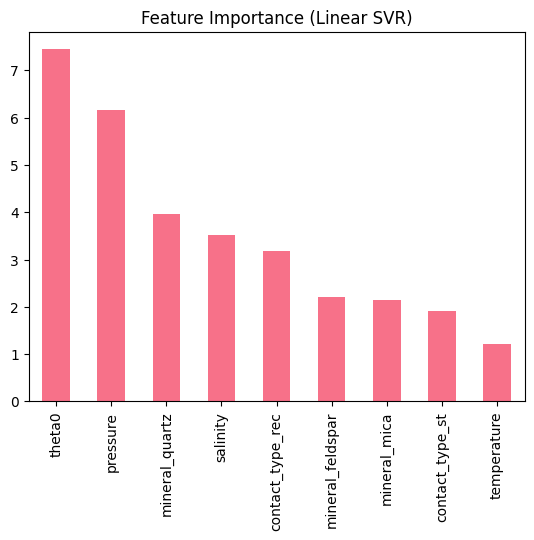

In [208]:
importance = np.abs(SVR_model.coef_[0])   # take absolute value
importance = pd.Series(importance, index=X_train.columns)
importance.sort_values(ascending=False, inplace=True)

print(importance)
importance.plot(kind='bar', title="Feature Importance (Linear SVR)")

## Xgboost

In [ ]:
param_grid = {
    'n_estimators': [300, 600, 900],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

grid = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train1, y_train)
print("Best parameters:", grid.best_params_)


In [209]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=800,          # number of boosting rounds (trees)
    learning_rate=0.05,        # smaller = slower but more stable learning
    max_depth=6,               # limits complexity of each tree
    min_child_weight=3,        # minimum samples per leaf node
    subsample=0.8,             # fraction of samples per tree (bagging)
    colsample_bytree=0.8,      # fraction of features per tree
    gamma=0.1,                 # minimum loss reduction required for split
    reg_alpha=0.1,             # L1 regularization (feature sparsity)
    reg_lambda=1.0,            # L2 regularization (prevents overfitting)
    random_state=42,           # reproducibility
    n_jobs=-1,                 # use all CPU cores
    objective='reg:squarederror',  # regression objective
    verbosity=0)  # silent training
XGB_model.fit(X_train1, y_train)
y_pred1 = XGB_model.predict(X_train1)
mae = metrics.mean_absolute_error(y_train, y_pred1)
mse= metrics.mean_squared_error(y_train, y_pred1)
rmse = mse**0.5
r2 = metrics.r2_score(y_train, y_pred1)
print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
""")


MSE: 	9.9596
MAE: 	2.4618
RMSE: 	3.156
r2: 	0.977



In [210]:
#performance on validation set
y_pred6 = XGB_model.predict(X_val1)
mae = metrics.mean_absolute_error(y_val, y_pred6)
mse= metrics.mean_squared_error(y_val, y_pred6)
rmse = mse**0.5
r2 = metrics.r2_score(y_val, y_pred6)
N = len(y_val)
AARE = (np.sum(np.abs((y_pred6 - y_val) / y_val)) / N) * 100

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
AARE: \t{AARE:.2f}%
""")


MSE: 	64.1080
MAE: 	6.3440
RMSE: 	8.007
r2: 	0.855
AARE: 	28.84%



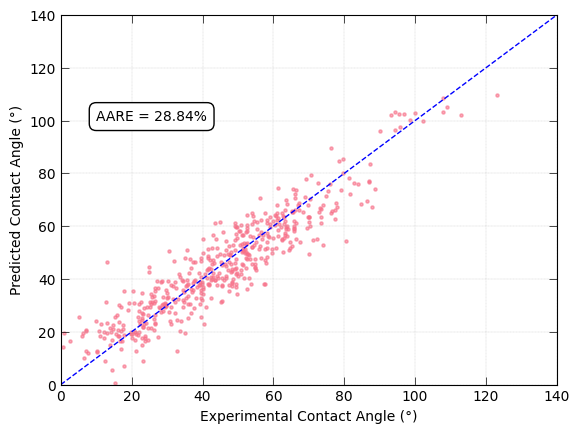

In [211]:
#visualize
plt.scatter(y_val, y_pred6, alpha=0.6, s=5)
plt.plot([0, 140], [0, 140], 'b--', lw=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tick_params(axis='both', which='both', direction='in',
                length=6, width=0.5, top=True, right=True)
plt.xlabel('Experimental Contact Angle (°)')
plt.ylabel('Predicted Contact Angle (°)')
# plt.title('Predicted vs Experimental Contact Angle')
plt.text(10, 100, f'AARE = {AARE:.2f}%', fontsize=10,
          bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
plt.xlim(0, 140)
plt.ylim(0, 140)
plt.show()

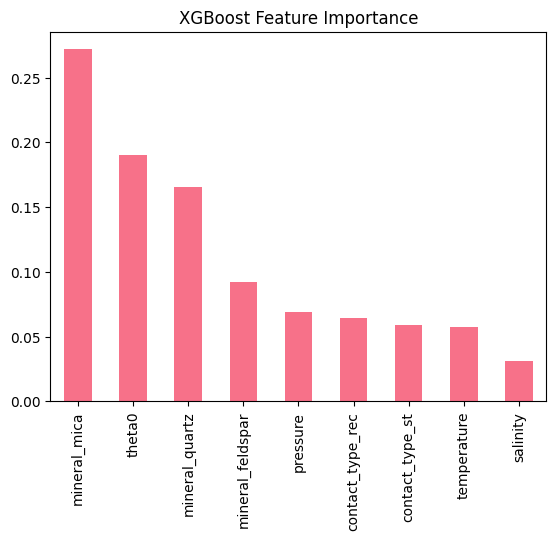

In [212]:
importance = pd.Series(XGB_model.feature_importances_, index=X_train.columns)
importance.sort_values(ascending=False).plot(kind='bar', title='XGBoost Feature Importance')
plt.show()

## Neural Network

In [213]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [214]:
# Optimized Neural Network architecture
model = Sequential([
    Dense(50, activation='elu', input_shape=(X_train1.shape[1],)),  # input layer
    BatchNormalization(),          # stabilize learning
    Dropout(0.2),                  # regularization (reduces overfitting)
    
    Dense(50, activation='elu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(50, activation='elu'),
    Dense(1)                       # output layer for regression
])

# Optimizer setup
optimizer = Adam(learning_rate=0.0005)  # start moderate; can try 0.0005 or 0.0001 if unstable

# Compile model
model.compile(
    optimizer=optimizer,
    loss='mae',                    # Mean Absolute Error works well for petrophysics
    metrics=[RootMeanSquaredError()]
)

# Early stopping callback (optional but powerful)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,          # stop if val_loss doesn’t improve for 10 epochs
    restore_best_weights=True
)


In [215]:
# Train model
history = model.fit(X_train1, y_train, validation_data=(X_val1, y_val), epochs=100, batch_size=32, verbose=0, callbacks=[early_stop])

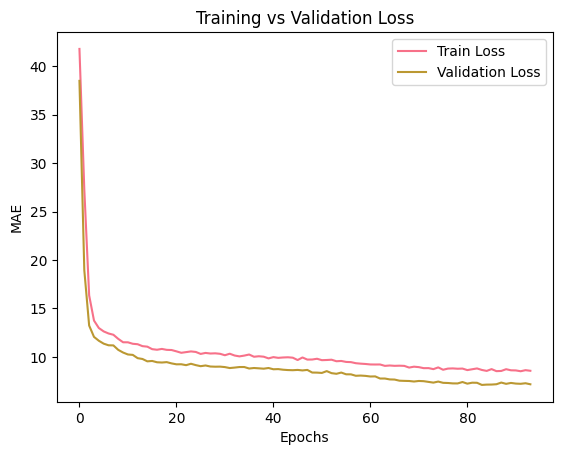

In [216]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [217]:
y_pred1 = model.predict(X_train1)
mae = metrics.mean_absolute_error(y_train, y_pred1)
mse= metrics.mean_squared_error(y_train, y_pred1)
rmse = mse**0.5
r2 = metrics.r2_score(y_train, y_pred1)
print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
""")

141/141 [==============================] - 1s 4ms/step

MSE: 	79.3119
MAE: 	6.9923
RMSE: 	8.906
r2: 	0.813



In [218]:
#performance on validation set
y_pred7 = model.predict(X_val1)
mae = metrics.mean_absolute_error(y_val, y_pred7)
mse= metrics.mean_squared_error(y_val, y_pred7)
rmse = mse**0.5
r2 = metrics.r2_score(y_val, y_pred7)

print(f"""
MSE: \t{mse:.4f}
MAE: \t{mae:.4f}
RMSE: \t{rmse:.3f}
r2: \t{r2:.3f}
""")

16/16 [==============================] - 0s 5ms/step

MSE: 	81.1648
MAE: 	7.0989
RMSE: 	9.009
r2: 	0.817



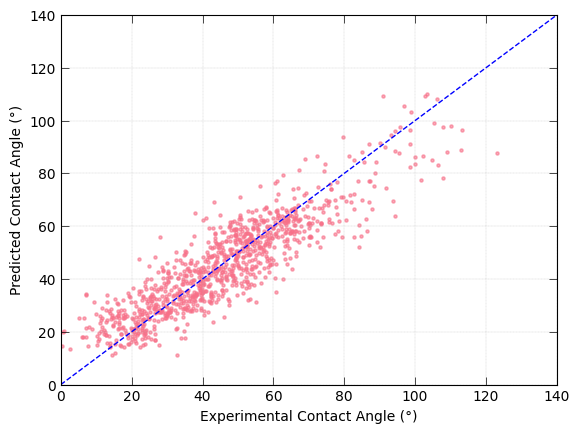

In [185]:
#visualize
import matplotlib.pyplot as plt


plt.scatter(y_val, y_pred7, alpha=0.6, s=5)
plt.plot([0, 140], [0, 140], 'b--', lw=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.tick_params(axis='both', which='both', direction='in',
                length=6, width=0.5, top=True, right=True)
plt.xlabel('Experimental Contact Angle (°)')
plt.ylabel('Predicted Contact Angle (°)')
# plt.title('Predicted vs Experimental Contact Angle')
#plt.text(10, 100, f'AARE = {AARE:.2f}%', fontsize=10,
         # bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.5))
plt.xlim(0, 140)
plt.ylim(0, 140)
plt.show()

## Test Prediction

In [ ]:
X_test1 = sc.transform(X_test)

In [ ]:
y_pred_test = model.predict(X_test1)

In [ ]:
Submission = pd.DataFrame({
    "id": test.index,
    "contact_angle": y_pred_test
})
Submission.to_csv("Team_alpha.csv", index=False)

In [ ]:
Submission.head()

,id,contact_angle
0,0,33.717271
1,1,35.068076
2,2,35.756570
3,3,39.824472
4,4,39.886748
